In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ="/content/drive/MyDrive/SoilProject/Dataset/Train"
test_dir ="/content/drive/MyDrive/SoilProject/Dataset/test"

In [ ]:
# Count of Images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
1215 Train images
340 Test images


Data Preprocessing - Scaling pixel values to the range [0,1] (for normalization), Shear transformations (tilting effect), zooming, validation split, and flipping

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, #Shear angle in counter-clockwise direction in degrees
                                   zoom_range=0.2, #Range for random zoom
                                   validation_split=0.2, # validation split 20%. fraction of data to reserve for validation.
                                   horizontal_flip=True)# Randomly flip inputs horizontally.
test_datagen=ImageDataGenerator(rescale=1./255)

Creating batches for the training and testing data and setting image dimensions and input shape

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =64

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


Assigning indices to class labels

In [ ]:
train_generator.class_indices

{'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}

Adding the convolution layers

In [ ]:
model = Sequential()
# First Convlutional Layer.
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
#Pooling reduces the spatial dimensions of the feature maps while retaining important information
model.add(MaxPooling2D(pool_size=(3, 3)))
# Second Convlutional Layer.
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Convlutional Layer.
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening - converts the multi-dimensional feature maps into a one-dimensional array
model.add(Flatten())
# Fuly Connected Layer.
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


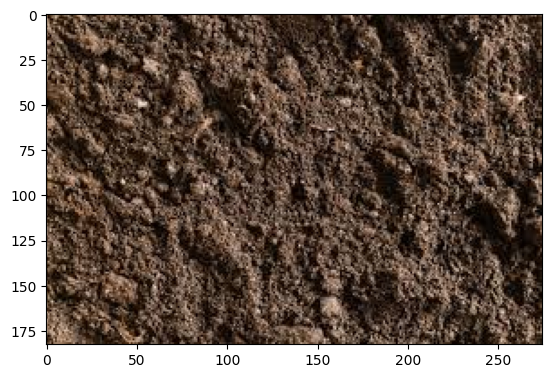

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/SoilProject/Dataset/Train/Black Soil/Black_17.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/SoilProject/Dataset/Train/Black Soil/Black_17.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
#First Convlutional Layer
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
#Second Convlutional Layer
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
#Third Convlutional Layer
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#Flatten
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_output.predict(img)

1/1 [==============================] - 0s 88ms/step


Visualizing the output feature maps after the first convolutional layer (conv2d_4)

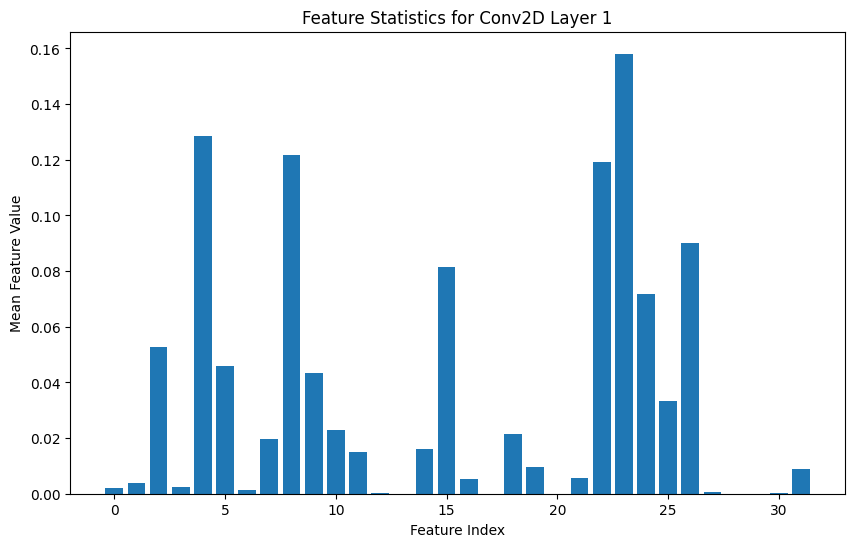

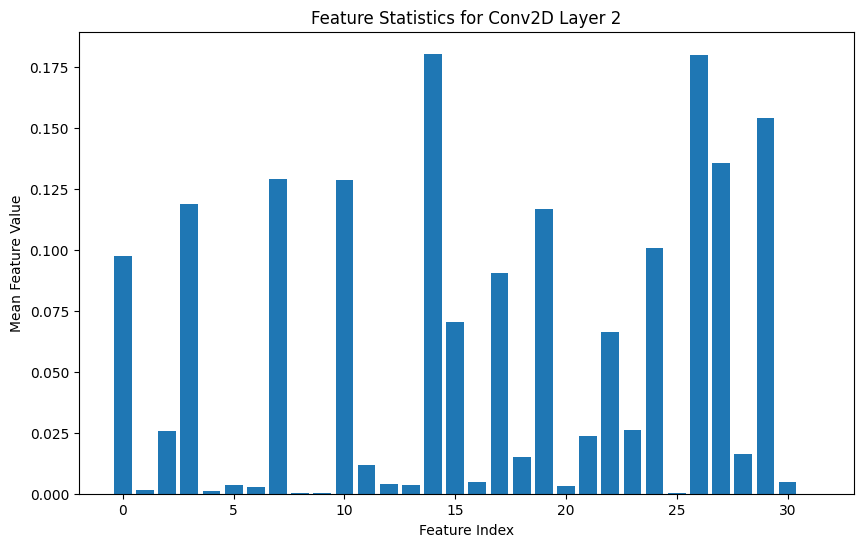

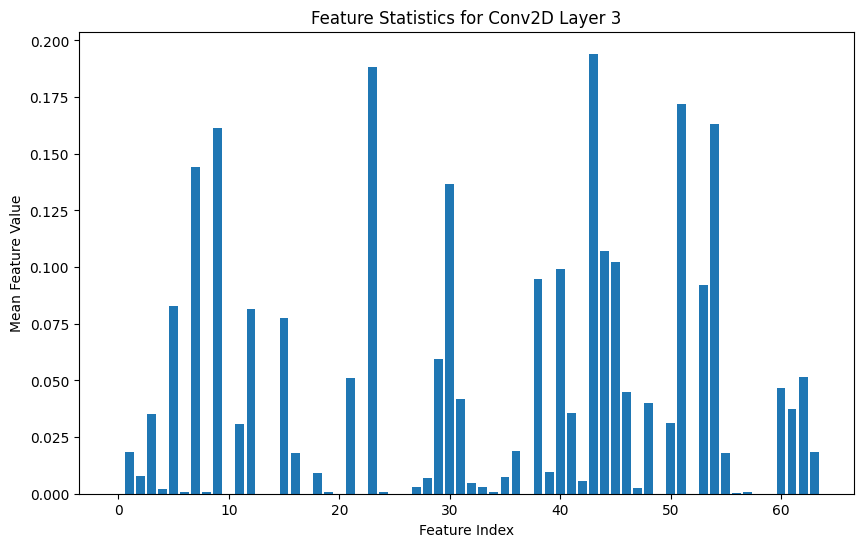

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to visualize feature statistics using bar plots
def visualize_feature_statistics(features, layer_name):
    # Compute the mean or sum of feature values across channels
    feature_stats = np.mean(features, axis=(0, 1, 2))  # You can also use np.sum() or other statistics
    num_features = len(feature_stats)

    # Plot the feature statistics using a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_features), feature_stats)
    plt.xlabel('Feature Index')
    plt.ylabel('Mean Feature Value')
    plt.title(f'Feature Statistics for {layer_name}')
    plt.show()

# Visualize feature statistics for each layer using bar plots
visualize_feature_statistics(conv2d_features, 'Conv2D Layer 1')
visualize_feature_statistics(conv2d_1_features, 'Conv2D Layer 2')
visualize_feature_statistics(conv2d_2_features, 'Conv2D Layer 3')

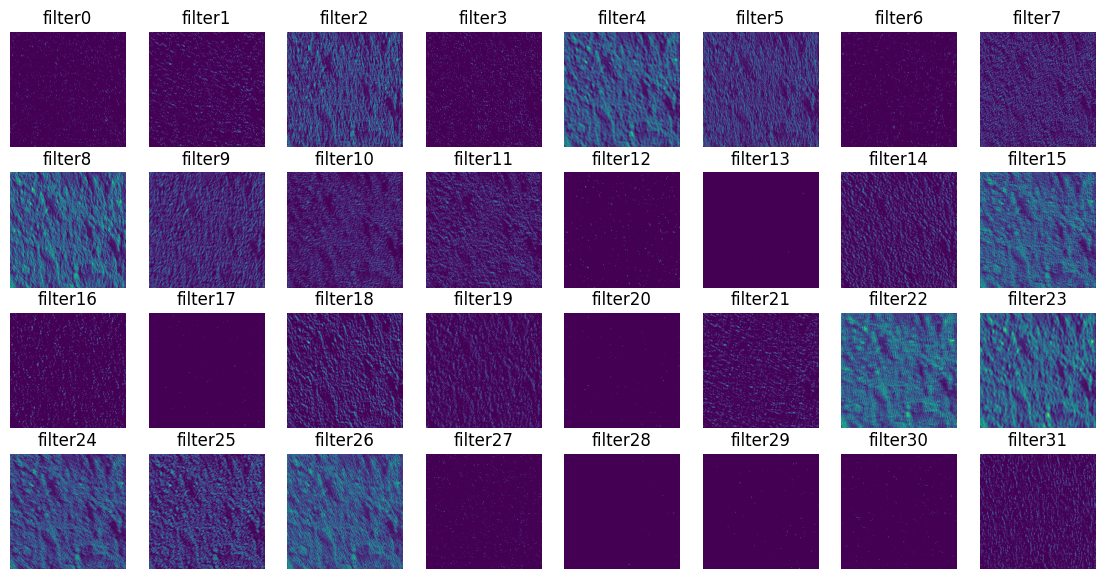

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

Visualizing the output feature maps after the first pooling layer

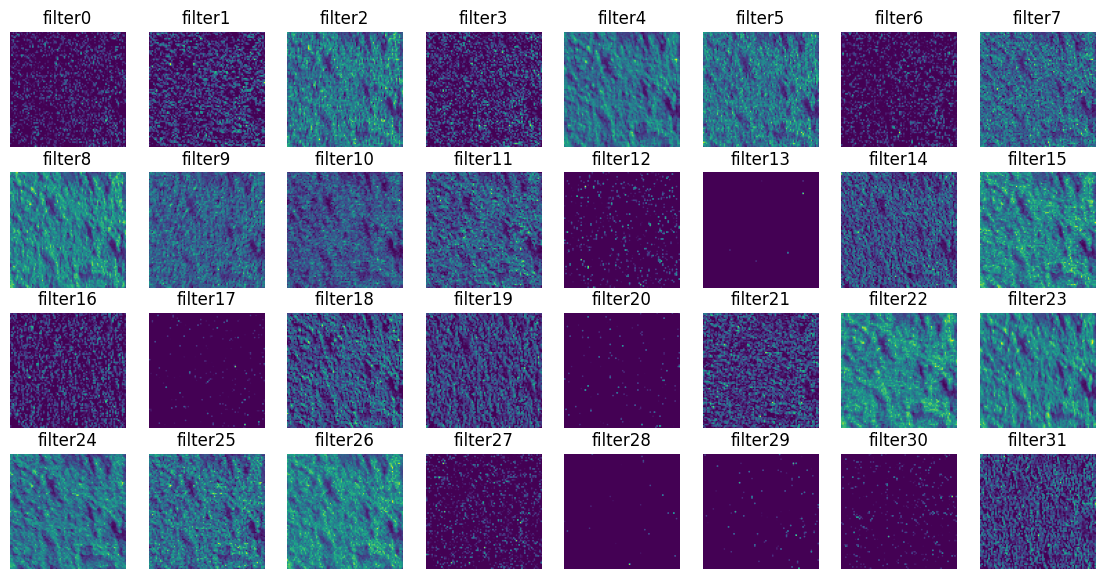

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

Visualizing the output feature maps after the second convolutional layer

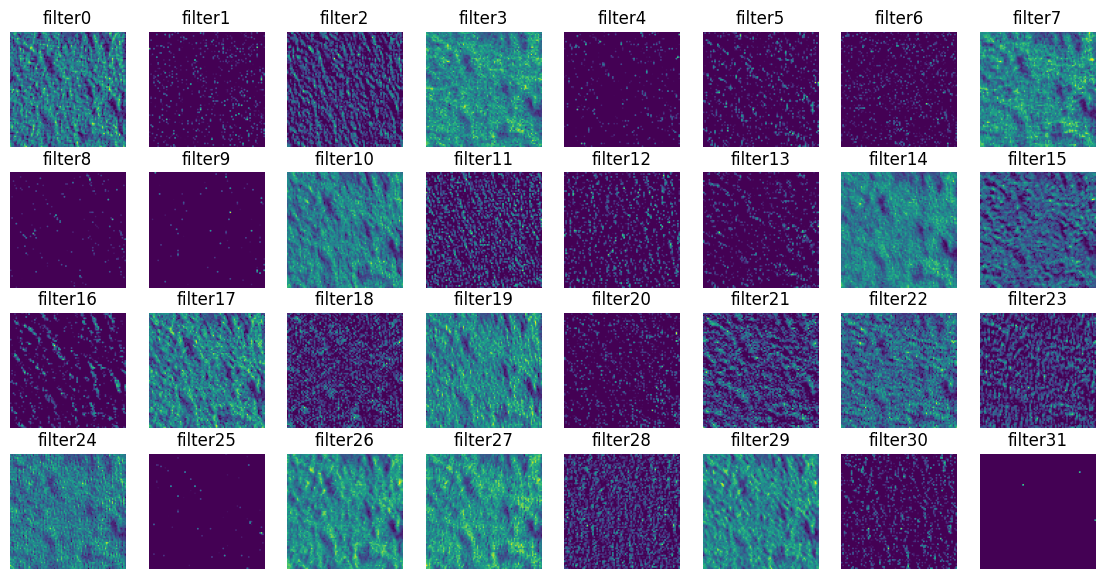

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

Visualizing the output feature maps after the second pooling layer

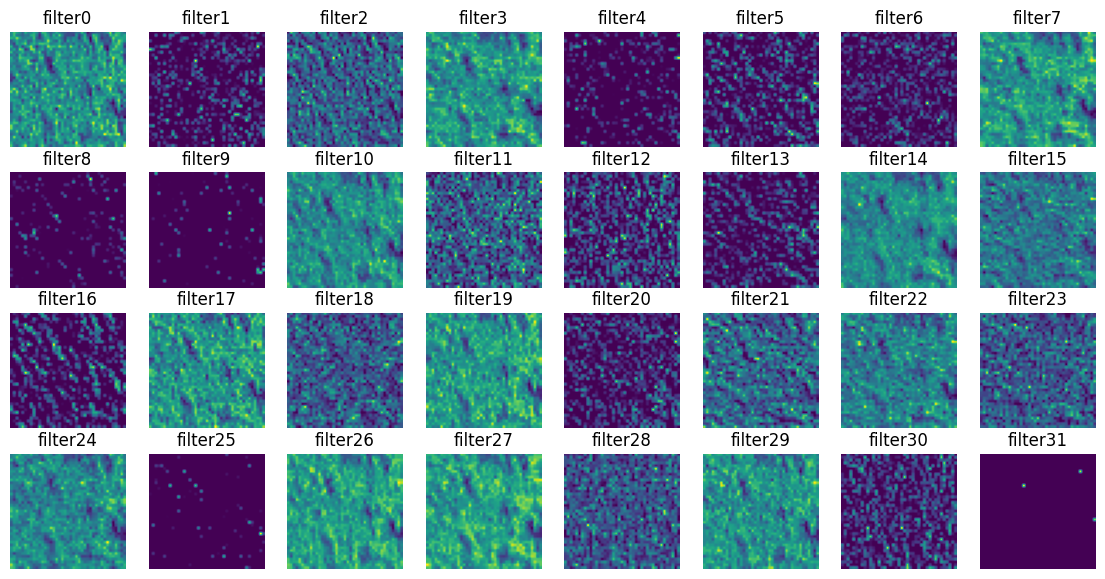

In [ ]:
#visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

Visualizing the output feature maps after the third convolutional layer

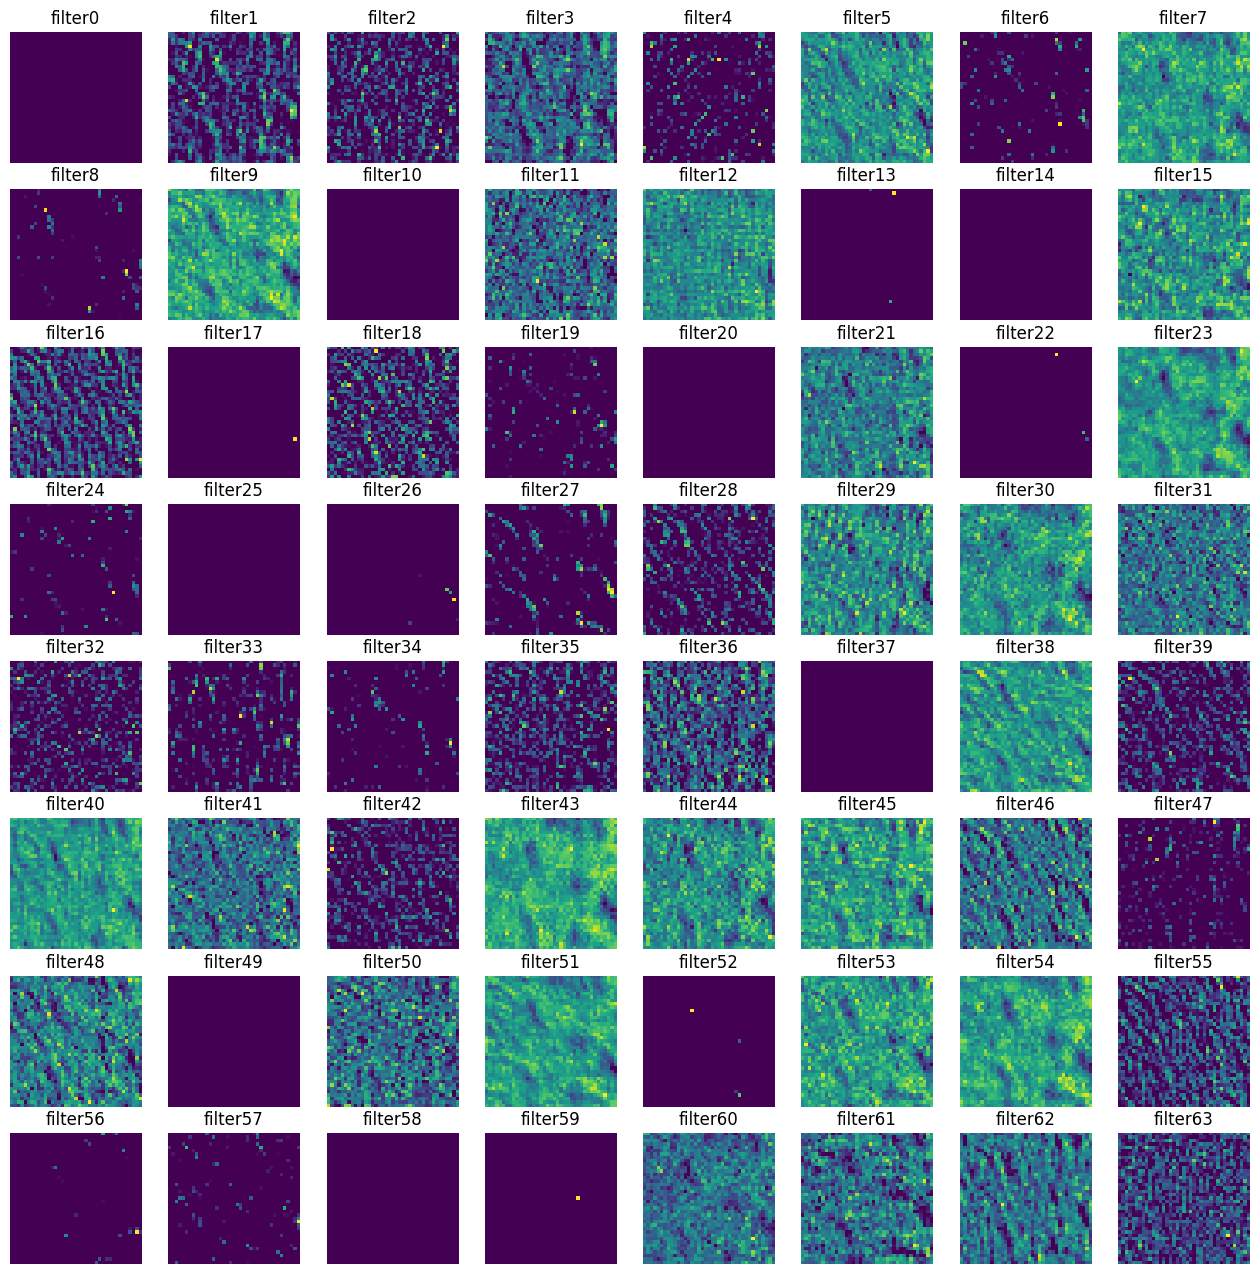

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

Visualizing the output feature maps after the third pooling layer

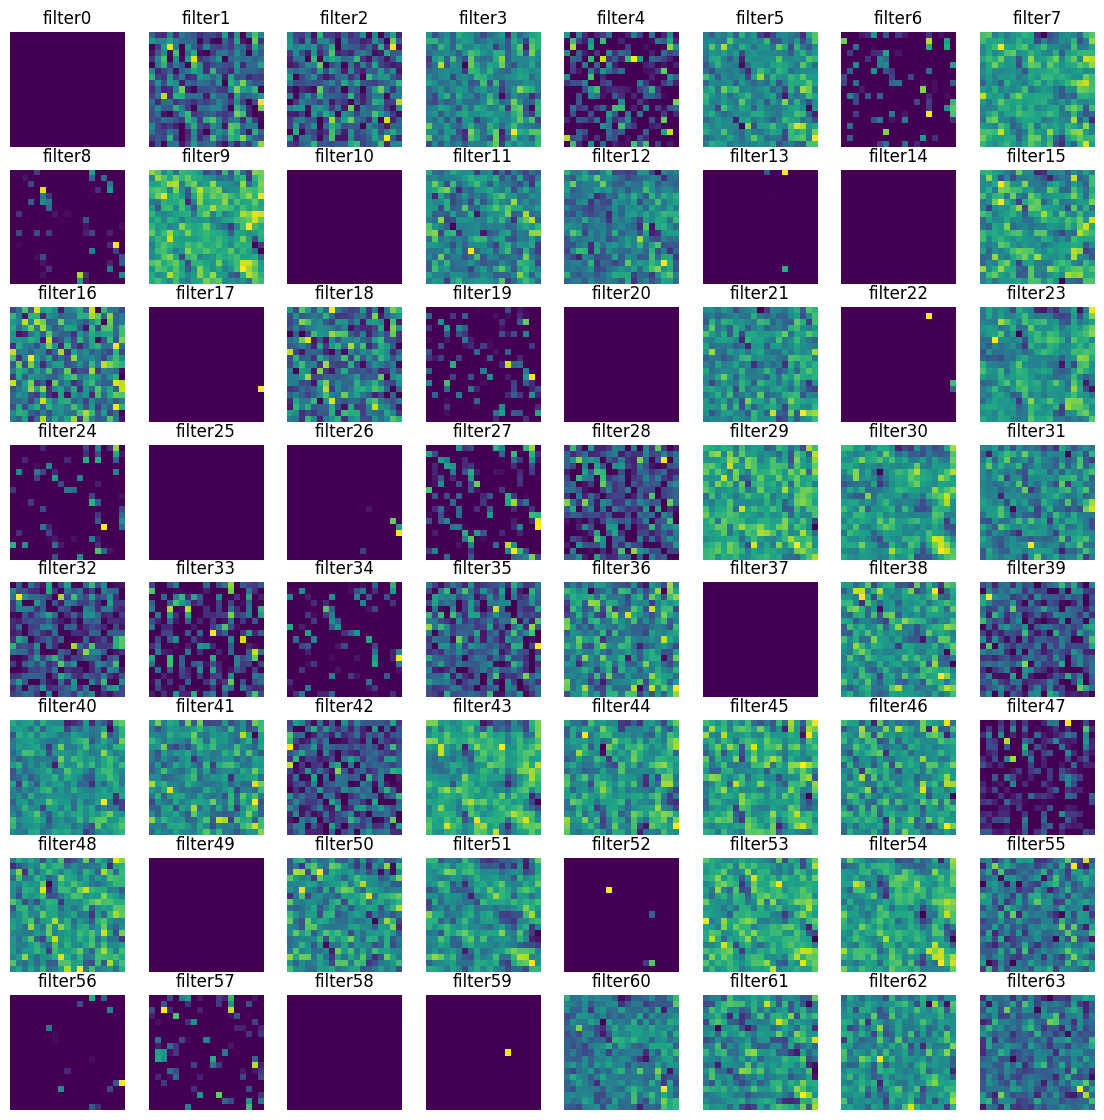

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

Setting up a validation data generator

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 1215 images belonging to 4 classes.


Compile the model, specify the training configuration, and train the model on the provided training data generator for a specified number of epochs

In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

train=model.fit_generator(train_generator,
                        epochs=10,
                          steps_per_epoch=train_generator.samples //  batch_size,verbose=1)

Epoch 1/10
18/18 [==============================] - 130s 7s/step - loss: 1.0560 - accuracy: 0.6386
Epoch 2/10
18/18 [==============================] - 122s 7s/step - loss: 0.6383 - accuracy: 0.7698
Epoch 3/10
18/18 [==============================] - 117s 6s/step - loss: 0.4330 - accuracy: 0.8323
Epoch 4/10
18/18 [==============================] - 120s 7s/step - loss: 0.3881 - accuracy: 0.8367
Epoch 5/10
18/18 [==============================] - 126s 7s/step - loss: 0.3417 - accuracy: 0.8671
Epoch 6/10
18/18 [==============================] - 120s 7s/step - loss: 0.3075 - accuracy: 0.8732
Epoch 7/10
18/18 [==============================] - 117s 6s/step - loss: 0.2469 - accuracy: 0.8923
Epoch 8/10
18/18 [==============================] - 117s 6s/step - loss: 0.2293 - accuracy: 0.9018
Epoch 9/10
18/18 [==============================] - 123s 7s/step - loss: 0.2163 - accuracy: 0.9192
Epoch 10/10
18/18 [==============================] - 125s 7s/step - loss: 0.2137 - accuracy: 0.9088


Visualizing the training accuracy and training loss over epochs during the training process

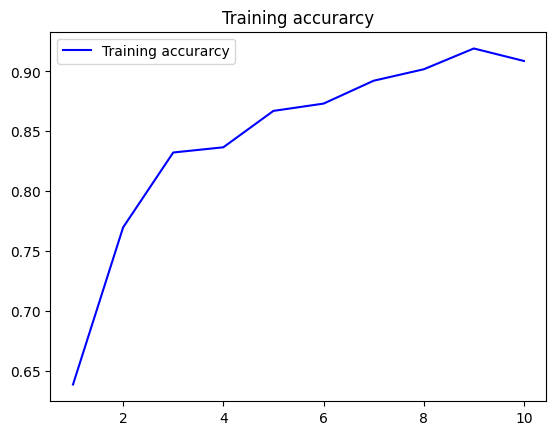

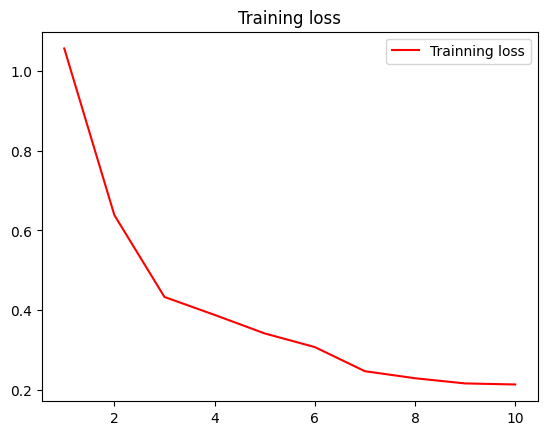

In [ ]:
acc = train.history['accuracy']

loss = train.history['loss']

epochs = range(1, len(acc) + 1)
#Train accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train loss

plt.plot(epochs, loss, 'r', label='Trainning loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('SoilModel.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('SoilType_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices
classes

{'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('SoilModel.h5')

Classes = ["Alluvial soil","Black Soil","Clay soil","Red soil"]

1/1 [==============================] - 0s 84ms/step
Black Soil


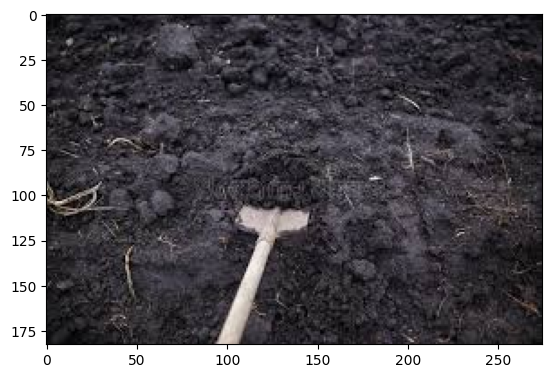

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


#result = model.predict([prepare('/content/drive/MyDrive/SoilProject/Dataset/test/Black Soil/Black_2.jpg')])
#disease=image.load_img('/content/drive/MyDrive/SoilProject/Dataset/test/Black Soil/Black_2.jpg')
#plt.imshow(disease)
#print (Classes[int(result)])

predictions = model.predict([prepare('/content/drive/MyDrive/SoilProject/Dataset/test/Black Soil/Black_4.jpg')])
predicted_class_index = np.argmax(predictions)
print(Classes[predicted_class_index])

disp=image.load_img('/content/drive/MyDrive/SoilProject/Dataset/test/Black Soil/Black_4.jpg')
plt.imshow(disp)
